Подключаем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

Загружаем датасет

In [2]:
df = pd.read_csv("4heart2.csv")

Выводим информацию о данных в датасете

In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Выводим первые 5 строк

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Приведем названия столбцов к нижнему регистру и исправим тип данных в пол возраст на int

In [5]:
df.columns = df.columns.str.lower()
df[["age"]] = df[["age"]].astype(int)

Проверим данные на наличие пропусков

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

Посмотрим количество явных дубликатов в данных

In [7]:
df.duplicated().sum()

0

Импортируем модуль sklearn

In [8]:
from sklearn.preprocessing import StandardScaler

Создаем объект класса scaler.
Обучаем стандартизатор и преобразуем набор данных

In [9]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

Импортируем из модуля для иерархической кластеризации hierarhy, классы модели linkage и dendrogram


In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Создаем таблицу связок между объектами

In [11]:
linked = linkage(df_sc, method="ward")

Построение дендрограммы

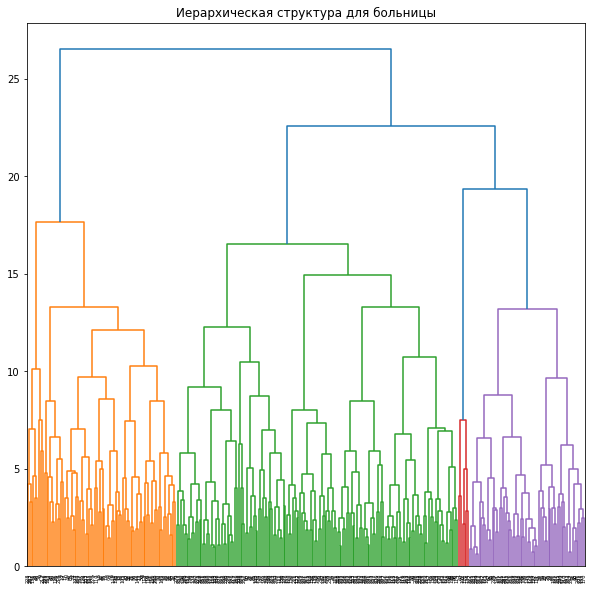

In [12]:
plt.figure(figsize=(10,10))
dendrogram(linked, orientation="top")
plt.title("Иерархическая структура для больницы")
plt.show()

Разделим данные на 4 кластера с применением метода KMeans и метрики высчитанной для агломеративной иерархической кластеризации

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(df_sc)

Находим среднее значение параметров по кластерам

In [14]:
df.groupby(labels).mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,57.500000,0.083333,4205.750000,0.500000,34.166667,0.083333,277893.005000,1.706667,139.166667,0.750000,0.333333,99.333333,0.666667
1,59.265060,0.469880,434.096386,0.518072,44.493976,0.409639,289411.423855,1.053855,137.710843,0.096386,0.012048,148.662651,0.060241
2,66.454545,0.545455,334.602273,0.420455,32.340909,0.465909,252990.320227,1.942159,134.318182,0.693182,0.329545,69.250000,0.920455
3,58.025862,0.353448,500.224138,0.336207,38.258621,0.250000,251077.916638,1.188879,137.336207,1.000000,0.534483,166.577586,0.017241


Метрика силуэта

In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(df_sc, labels)

0.1072761322370461

Построим график важности характеристик

In [16]:
from sklearn.ensemble import RandomForestClassifier

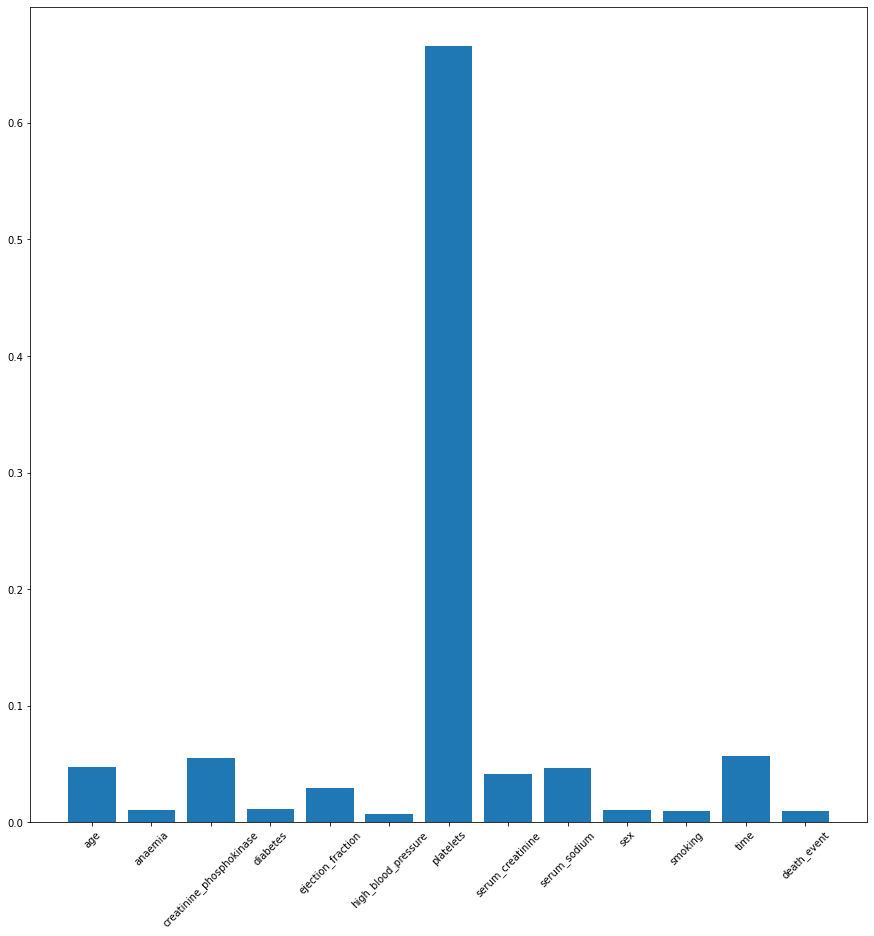

In [17]:
km2 = KMeans(4)
km2.fit(df)

clf = RandomForestClassifier()
clf.fit(df, km2.labels_)

plt.figure(figsize=(15, 15))
plt.bar(df.columns, height=clf.feature_importances_)
plt.xticks(rotation=45)

plt.show()

### Метод KMeans

In [18]:
km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(df_sc)

Рассчитали евклидово расстояние между кластерами и отобразили их на тепловой карте

<AxesSubplot:>

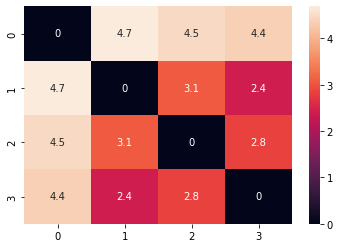

In [19]:
from sklearn.metrics.pairwise import euclidean_distances
from seaborn import heatmap

heatmap(euclidean_distances(km.cluster_centers_), annot=True)

Разделил данные на 2 класса и посчитаем средние значения

Так как у нас бинарный результат, то посмотрим какие результаты мы получем для средних значений призноков при резбиении на 2 класса.

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2, random_state = 0)  
labels_km = km.fit_predict(df_sc)

df.groupby(labels_km).mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,65.380000,0.500000,656.680000,0.410000,33.180000,0.400000,257505.803000,1.928400,135.280000,0.650000,0.310000,71.250000,0.950000
1,58.542714,0.396985,544.231156,0.422111,40.547739,0.326633,266298.846482,1.125276,137.301508,0.648241,0.326633,159.914573,0.005025


In [21]:
# Метрика силуета
from sklearn.metrics import silhouette_score
silhouette_score(df_sc, labels_km)

0.1512086319964812

Построили график важности характеристик

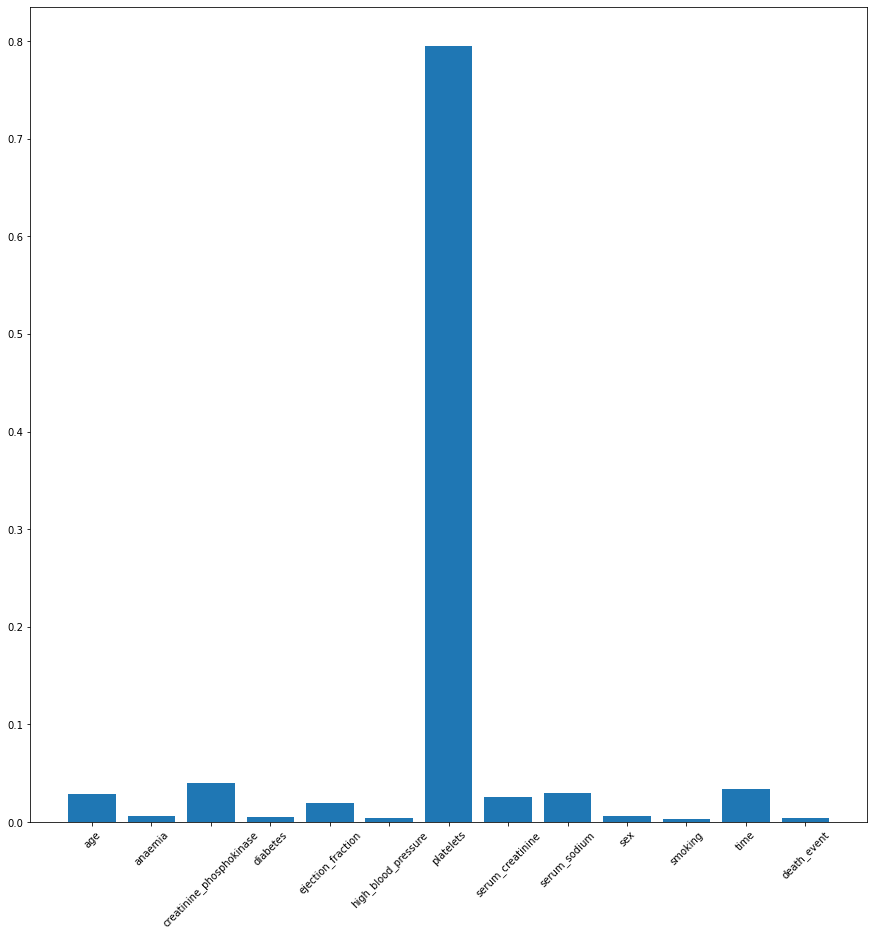

In [22]:
km2 = KMeans(2)
km2.fit(df)

clf = RandomForestClassifier()
clf.fit(df, km2.labels_)

plt.figure(figsize=(15, 15))
plt.bar(df.columns, height=clf.feature_importances_)
plt.xticks(rotation=45)

plt.show()

Определение оптимального числа кластеров

Чтобы рассчитать оптимальное число кластеров, воспользуемся критерием – суммы квадратов расстояний от точек до центроидов кластеров, к которым они относятся.

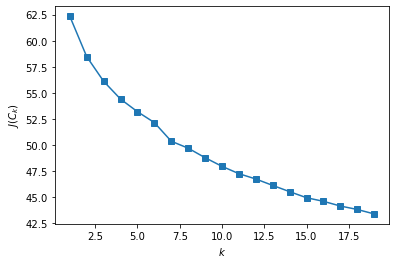

In [23]:
inertia = []
mx = 20
for k in range(1, mx):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_sc)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, mx), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

График получился довольно плавный поэтому конкретное число кластером не так очевидно. По правилу локтя оптимальным можно выбрать значения 5, 6, или 7, потому что до 5 значения J(Cₖ) быстро падает с увеличением количества кластеров, а после 7 падение сильно замедляется.